In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


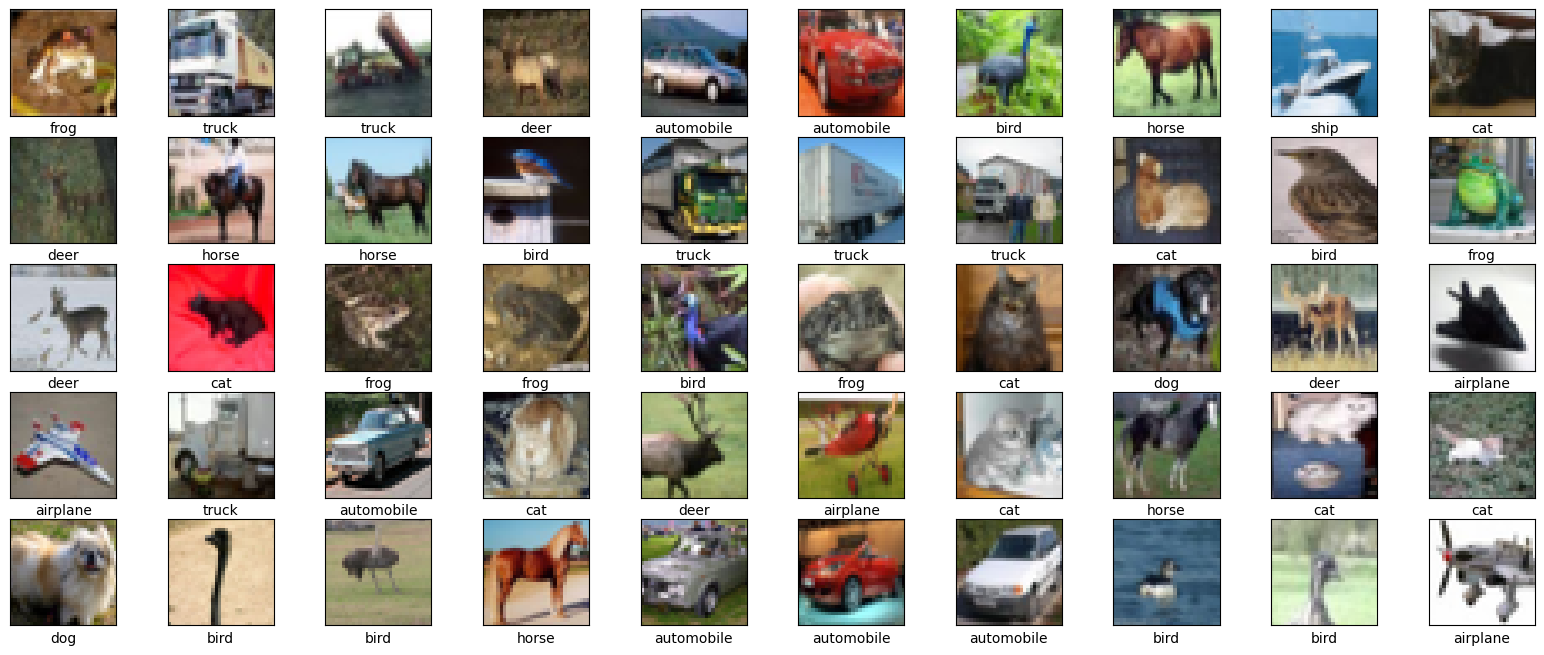

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train, X_test = X_train, X_test


In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    # layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [7]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)


In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [9]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 61s 48ms/step - loss: 2.0125 - accuracy: 0.3431 - val_loss: 1.5970 - val_accuracy: 0.4192
Epoch 2/50
1250/1250 [==============================] - 60s 48ms/step - loss: 1.4193 - accuracy: 0.4961 - val_loss: 1.3747 - val_accuracy: 0.5141
Epoch 3/50
1250/1250 [==============================] - 61s 49ms/step - loss: 1.2892 - accuracy: 0.5461 - val_loss: 1.3005 - val_accuracy: 0.5424
Epoch 4/50
1250/1250 [==============================] - 61s 48ms/step - loss: 1.1915 - accuracy: 0.5834 - val_loss: 1.2786 - val_accuracy: 0.5571
Epoch 5/50
1250/1250 [==============================] - 58s 46ms/step - loss: 1.1111 - accuracy: 0.6149 - val_loss: 1.2258 - val_accuracy: 0.5758
Epoch 6/50
1250/1250 [==============================] - 59s 47ms/step - loss: 1.0578 - accuracy: 0.6318 - val_loss: 1.2094 - val_accuracy: 0.5897
Epoch 7/50
1250/1250 [==============================] - 57s 45ms/step - loss: 0.9969 - accuracy: 0.6541 - val_loss: 1.2400 -

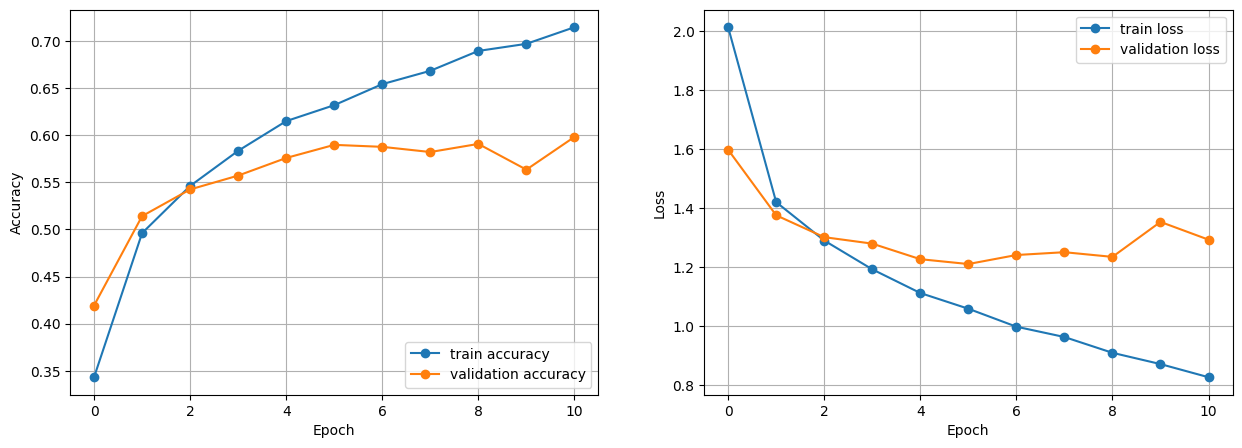

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)


313/313 [==============================] - 5s 15ms/step - loss: 1.2245 - accuracy: 0.5835

Test Accuracy: 0.5835000276565552

Test Loss: 1.2244945764541626


In [12]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [13]:
predictions[0]

array([0.00144219, 0.00859566, 0.0048359 , 0.47398907, 0.00169252,
       0.35642007, 0.04820325, 0.00658078, 0.01899893, 0.07924167],
      dtype=float32)

In [14]:
np.argmax(predictions[0])

3

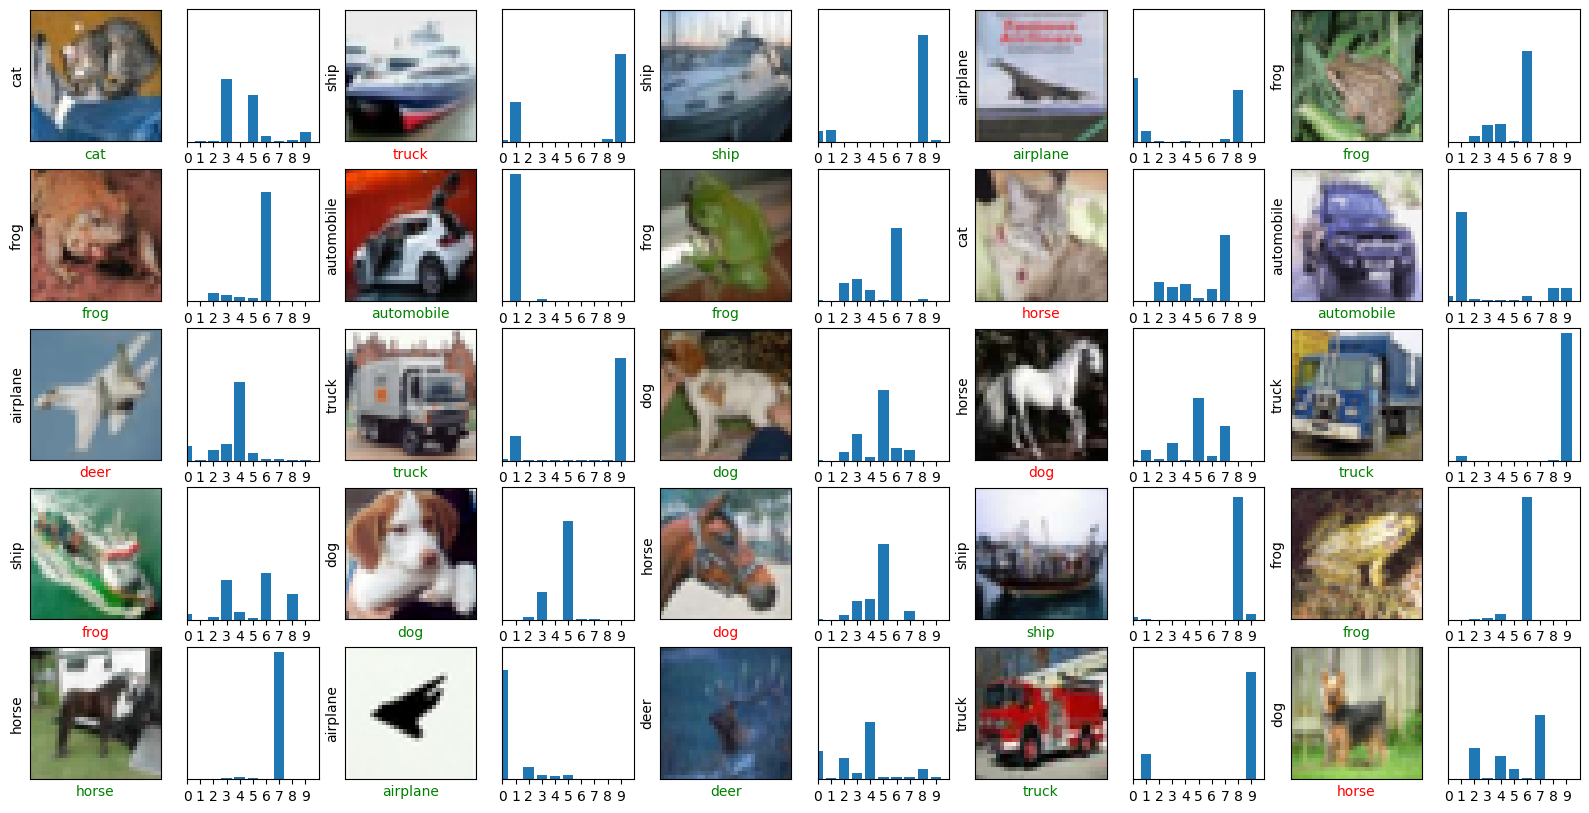

In [15]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

In [16]:
model.compile(
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [18]:
h1 = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 58s 46ms/step - loss: 1.4463 - accuracy: 0.5027 - val_loss: 1.6048 - val_accuracy: 0.4627
Epoch 2/50
1250/1250 [==============================] - 58s 46ms/step - loss: 1.3333 - accuracy: 0.5478 - val_loss: 1.4139 - val_accuracy: 0.5349
Epoch 3/50
1250/1250 [==============================] - 57s 46ms/step - loss: 1.2745 - accuracy: 0.5647 - val_loss: 1.6957 - val_accuracy: 0.4861
Epoch 4/50
1250/1250 [==============================] - 58s 46ms/step - loss: 1.2346 - accuracy: 0.5799 - val_loss: 1.4654 - val_accuracy: 0.5162
Epoch 5/50
1250/1250 [==============================] - 57s 46ms/step - loss: 1.2092 - accuracy: 0.5868 - val_loss: 1.4128 - val_accuracy: 0.5368
Epoch 6/50
1250/1250 [==============================] - 56s 45ms/step - loss: 1.1850 - accuracy: 0.5993 - val_loss: 1.4373 - val_accuracy: 0.5276
Epoch 7/50
1250/1250 [==============================] - 58s 46ms/step - loss: 1.1553 - accuracy: 0.6061 - val_loss: 1.4855 -

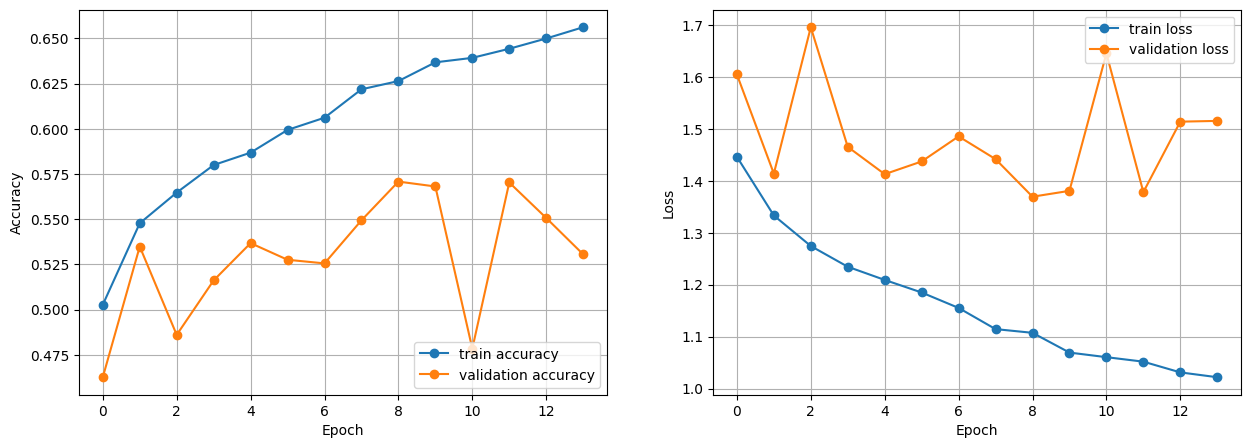

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 1.3895 - accuracy: 0.5668

Test Accuracy: 0.5667999982833862

Test Loss: 1.389461636543274


In [21]:
predictions = model.predict(X_test)

313/313 [==============================] - 5s 16ms/step


In [22]:
predictions[0]

array([0.01034709, 0.00387259, 0.01769795, 0.61004055, 0.04172731,
       0.10535387, 0.10276716, 0.01095438, 0.03957582, 0.05766328],
      dtype=float32)

In [23]:
np.argmax(predictions[0])

3

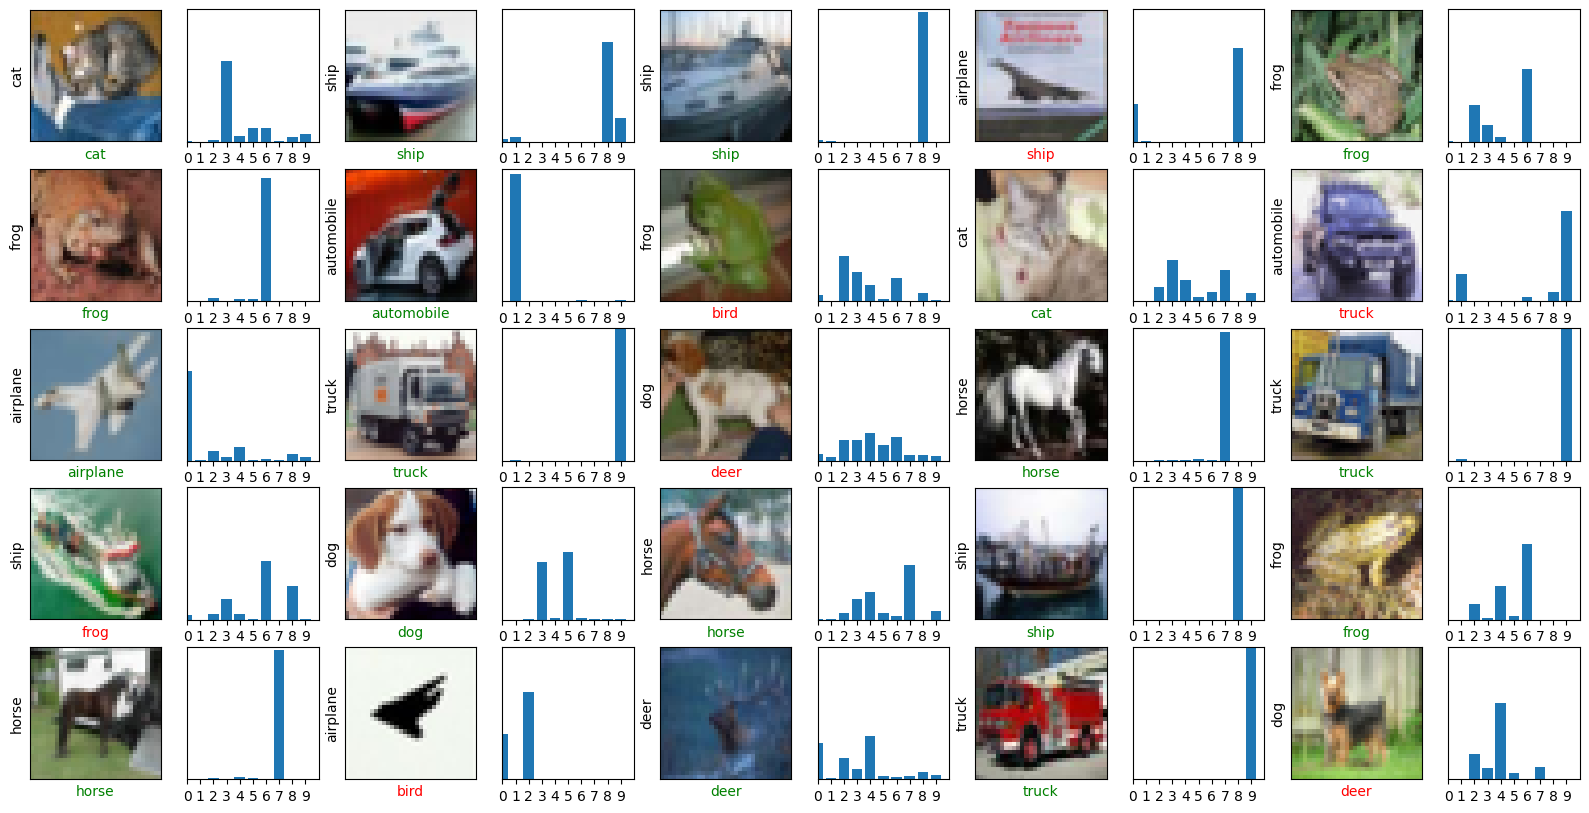

In [24]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

In [25]:
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.9),
    loss= tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [27]:
h2 = model.fit(x=X_train, y=Y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 59s 47ms/step - loss: 2.3121 - accuracy: 0.1025 - val_loss: 2.3045 - val_accuracy: 0.0952
Epoch 2/50
1250/1250 [==============================] - 57s 45ms/step - loss: 2.3040 - accuracy: 0.1007 - val_loss: 2.3062 - val_accuracy: 0.0952
Epoch 3/50
1250/1250 [==============================] - 58s 47ms/step - loss: 2.3039 - accuracy: 0.1006 - val_loss: 2.3046 - val_accuracy: 0.1025
Epoch 4/50
1250/1250 [==============================] - 57s 45ms/step - loss: 2.3041 - accuracy: 0.1018 - val_loss: 2.3042 - val_accuracy: 0.1003
Epoch 5/50
1250/1250 [==============================] - 58s 47ms/step - loss: 2.3039 - accuracy: 0.0990 - val_loss: 2.3059 - val_accuracy: 0.1014
Epoch 6/50
1250/1250 [==============================] - 57s 46ms/step - loss: 2.3041 - accuracy: 0.0993 - val_loss: 2.3051 - val_accuracy: 0.0952
Epoch 7/50
1250/1250 [==============================] - 58s 47ms/step - loss: 2.3041 - accuracy: 0.1001 - val_loss: 2.3049 -

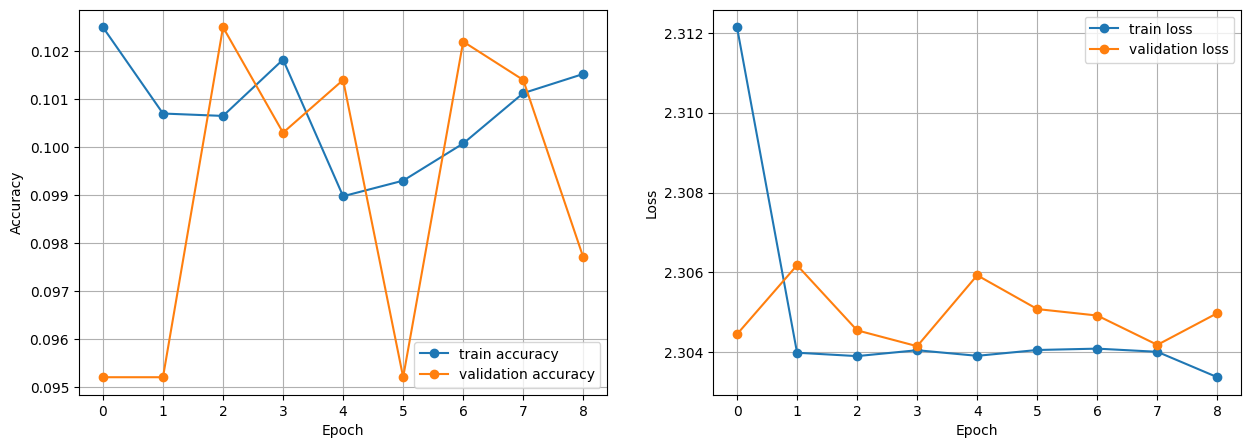

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [29]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 5s 16ms/step - loss: 2.3030 - accuracy: 0.1000

Test Accuracy: 0.10000000149011612

Test Loss: 2.303013563156128


In [30]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [31]:
predictions[0]

array([0.09406005, 0.1003943 , 0.0985584 , 0.09928647, 0.10289283,
       0.09938046, 0.10248032, 0.10303897, 0.10330753, 0.09660066],
      dtype=float32)

In [32]:
np.argmax(predictions[0])

8

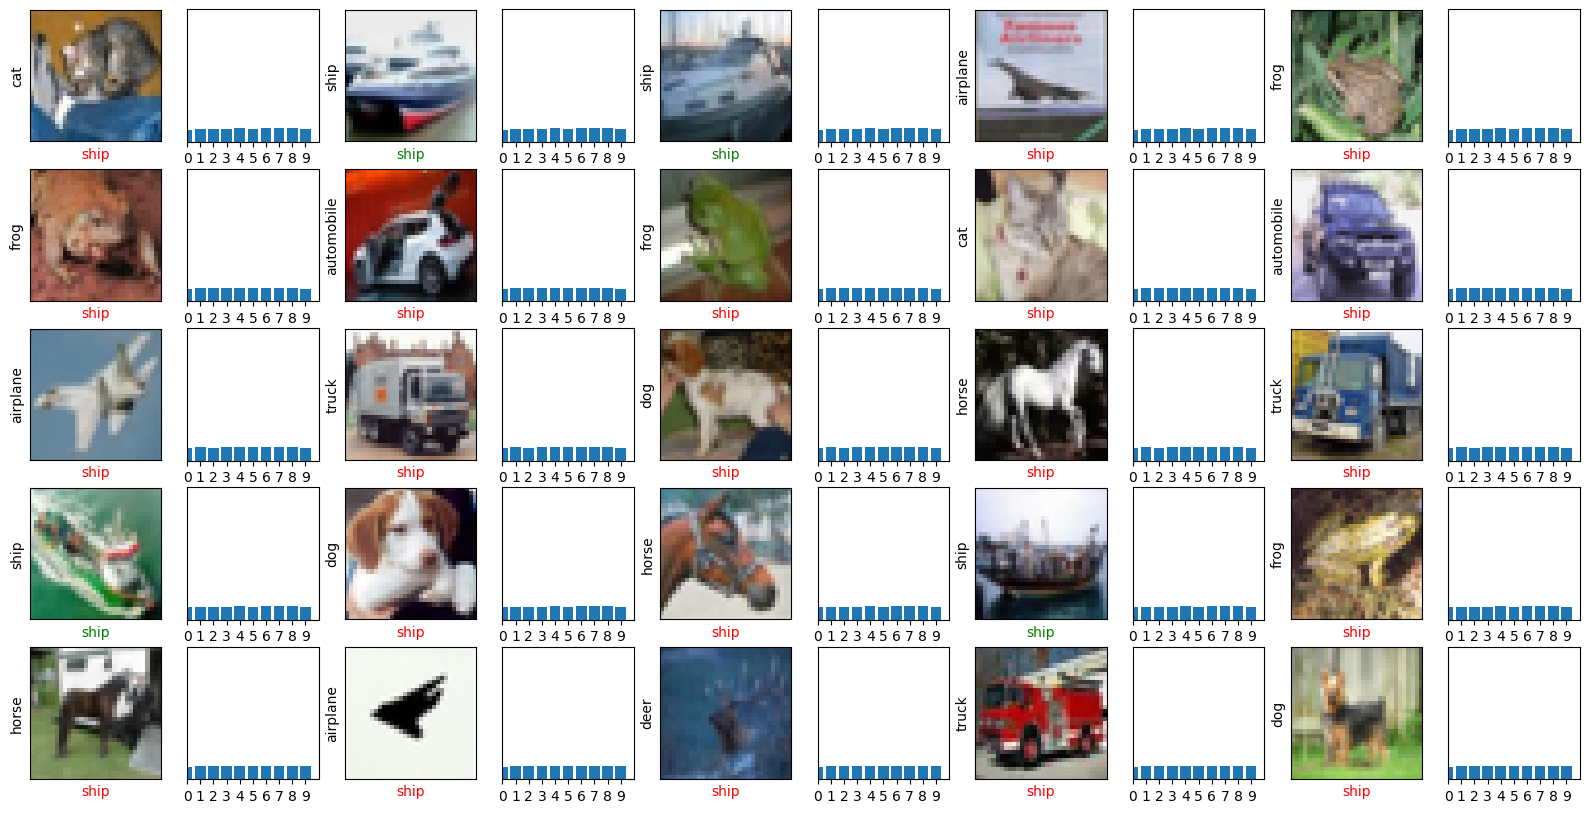

In [33]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

For non-normalized data Adam test loss was 2.303013563156128, which is 2 times of the normalized data. And the accuracy is 0.10000000149011612 which is half of the normalized one. But we look at the graph there was no overfitting. Sgd and RMSprop are also performing poor for non-normalized. Here Adam is performing comparatively better.